## Counts Scraping

Co-Occurence of Term Analysis

Co-occurence of terms analysis: check how often pre-selected cognitive terms appear in abstracts with ERP terms. 

This analysis searches through pubmed for papers that contain specified ERP and COG terms. Data extracted is the count of the number of papers with both terms. This is used to infer what cognitive terms each ERP is affiliated with. 

NOTE:
- COG terms here are a somewhat arbitrary selection: need a better set of terms, less arbitrarily selected. 

In [12]:
# TODO:
# - add erp_keys and term_keys list to use for axes
# - fix duplicate erp terms
# - clustering: latent factors on ERPs?

In [9]:
%load_ext autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# Import custom code
from erpsc.count import Count
from erpsc.core.io import save_pickle_obj, load_pickle_obj

In [11]:
# Initialize object for term count co-occurences. 
counts = Count()

In [ ]:
# Load ERPS and terms from file
counts.set_erps_file()
counts.set_terms_file('cognitive')

In [ ]:
# OR: Set small set of ERPs and terms for tests

# Small test set of words
erps = ['P100', 'N400', 'P600', 'N100', 'N170']
cog_terms = ['language', 'memory', 'visual', 'auditory', 'face', 'representation'] 

# Add ERPs and terms
counts.set_erps(erps)
counts.set_terms(cog_terms)

In [ ]:
# Scrape the co-occurence of terms data
counts.scrape_data(db='pmc')

In [ ]:
# Save pickle file of results
save_pickle_obj(counts, 'test2')

In [3]:
# Load from pickle file
counts = load_pickle_obj('CogScrape_counts')

## Scrape Information

In [5]:
# Check database information
counts.db_info

{'count': '4369521',
 'dbbuild': 'Build170315-0100m.1',
 'dbname': 'pmc',
 'description': 'PubMed Central',
 'lastupdate': '2017/03/15 07:28',
 'menuname': 'PMC'}

In [8]:
# Check requester details
counts.req.check()

Requester object is active: 	 False
Number of requests sent: 	 1404
Requester opened: 		 00:32 Thursday 16 March
Requester closed: 		 00:56 Thursday 16 March
Most recent request sent at: 	 1489650968.51631


# Check Counts

In [30]:
# Check the most commonly associated COG term for each ERP
counts.check_cooc_erps()

For the  P40   the most common association is 	 memory     with 	 %15.71
For the  P50   the most common association is 	 memory     with 	 %18.98
For the  P60   the most common association is 	 social     with 	 %20.57
For the  P100  the most common association is 	 attention  with 	 %16.40
For the  P200  the most common association is 	 attention  with 	 %26.38
For the  P300  the most common association is 	 attention  with 	 %23.99
For the  P3a   the most common association is 	 cognitive  with 	 %68.13
For the  P3b   the most common association is 	 cognitive  with 	 %78.66
For the  P340  the most common association is 	 attention  with 	 %16.67
For the  P350  the most common association is 	 attention  with 	 %17.83
For the  P400  the most common association is 	 attention  with 	 %21.31
For the  P600  the most common association is 	 memory     with 	 %61.65
For the  N50   the most common association is 	 memory     with 	 %16.24
For the  N60   the most common association is 	 att

In [31]:
# Check the most commonly associated ERP for each term
counts.check_cooc_terms()

For  attention    the strongest associated ERP is 	 N2pc  with 	 %94.71
For  auditory     the strongest associated ERP is 	 VsEP  with 	 %69.23
For  awareness    the strongest associated ERP is 	 N2pc  with 	 %30.36
For  categorization the strongest associated ERP is 	 N170  with 	 %37.99
For  cognitive    the strongest associated ERP is 	 N2pc  with 	 %84.68
For  decision making the strongest associated ERP is 	 P3b   with 	 %27.21
For  emotion      the strongest associated ERP is 	 N170  with 	 %45.08
For  face         the strongest associated ERP is 	 N170  with 	 %79.53
For  language     the strongest associated ERP is 	 N400  with 	 %71.12
For  learning     the strongest associated ERP is 	 N400  with 	 %52.01
For  memory       the strongest associated ERP is 	 N400  with 	 %75.05
For  motor        the strongest associated ERP is 	 N450  with 	 %54.67
For  pain         the strongest associated ERP is 	 N140  with 	 %16.88
For  phonology    the strongest associated ERP is 	 N400  w

In [32]:
# Check the terms with the most papers
counts.check_top()

The most studied ERP is  BP      with   459812 papers
The most studied term is  attention  with   752968  papers


In [33]:
# Check how many papers were found for each term - ERPs
counts.check_counts('erp')

P40   -    23112
P50   -    71502
P60   -    15310
P100  -     8007
P200  -     2710
P300  -    29566
P3a   -     2002
P3b   -     1687
P340  -      138
P350  -      415
P400  -     1272
P600  -      837
N50   -     7192
N60   -      597
N80   -      451
N100  -     1571
N140  -      231
N170  -     1353
N200  -     1126
MMN   -     8686
N2a   -     4923
N2b   -     1744
N2c   -      731
N240  -       86
N270  -      115
N2pc  -      359
N300  -      320
N400  -     2140
N450  -      150
N600  -       65
C1    -   159639
LPC   -     5126
LPP   -     3448
MRPC  -      166
CNV   -    11861
PINV  -      361
ERN   -     9621
ELAN  -     5570
CPS   -    16508
LRP   -     9535
LDN   -     1471
ORN   -     5777
SEP   -    38340
VsEP  -       65
BP    -   459812
Pe    -   184261
CRN   -     2990
MFN   -     1276
SPN   -     2973
ADAN  -      985
FRN   -     1411
Nc    -   285314
Pd    -   153725
EDAN  -      257
ADAN  -      985
NSW   -    26870
PSW   -      860
EPN   -     1547
SN    -    845

In [34]:
# Check how many papers were found for each term - COGs
counts.check_counts('term')

attention          -     752968
auditory           -      95912
awareness          -     203749
categorization     -      49473
cognitive          -     333828
decision making    -     171001
emotion            -      62549
face               -     450088
language           -     267057
learning           -     345323
memory             -     349823
motor              -     353743
pain               -     547858
phonology          -       3928
reasoning          -      74883
reward             -      74094
semantic           -      41327
spatial            -     407905
speech             -      98492
social             -     601335
somatosensory      -      39010
tactile            -      29348
vision             -     217293


## Viz / Exploration - Tests

In [5]:
# Create axis labels
counts.erp_labels = [erp[0] for erp in counts.erps]
counts.term_labels = [term[0] for term in counts.terms]

In [6]:
%autoreload 2
%matplotlib inline

import pandas as pd

import sklearn.metrics.pairwise as pp

import scipy.cluster.hierarchy as hier

import seaborn as sns

import matplotlib.pyplot as plt

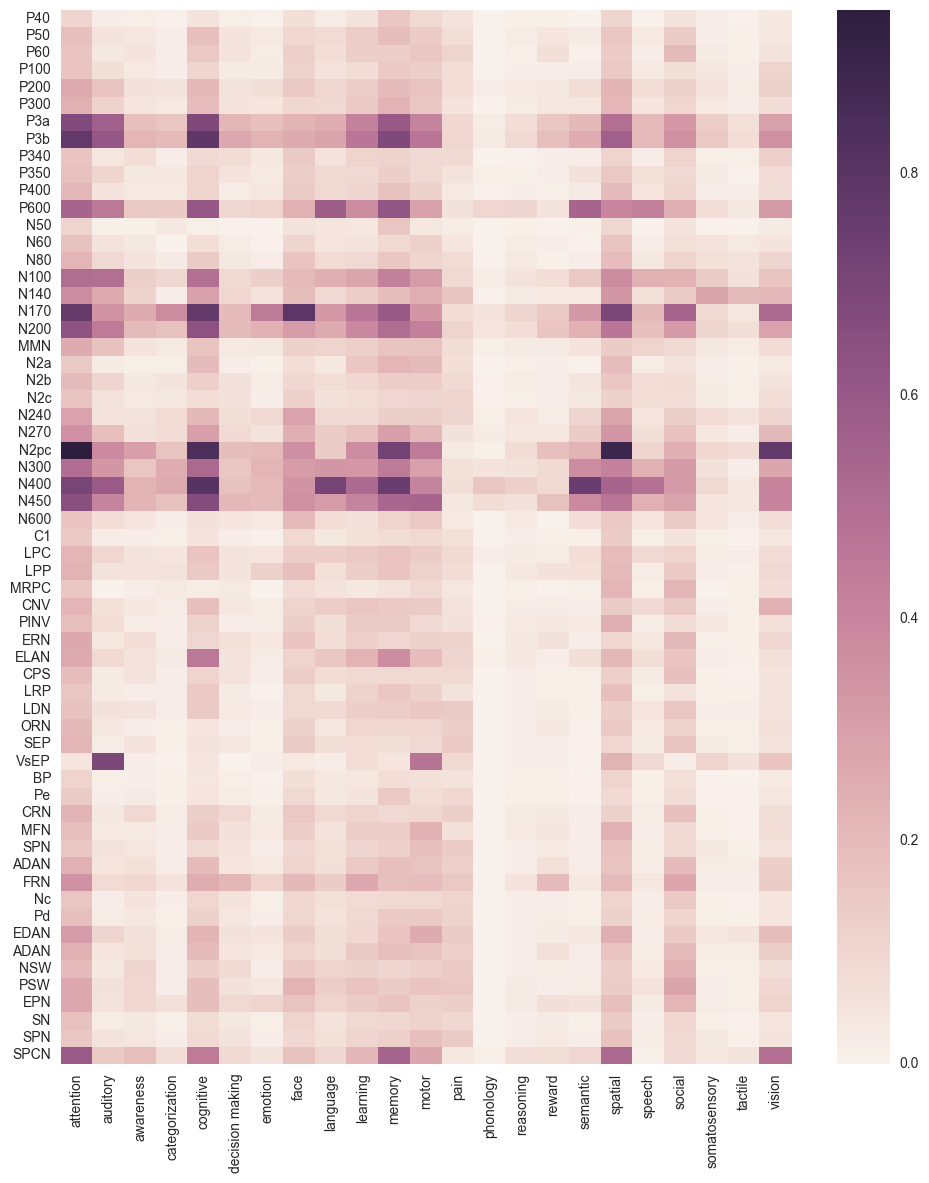

In [9]:
# Plot dat_percent of counts
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(counts.dat_percent, square=False,
            xticklabels=counts.term_labels, 
            yticklabels=counts.erp_labels)
f.tight_layout()

In [26]:
# Calculate similarity between all ERPs
sim = pp.cosine_similarity(counts.dat_percent)

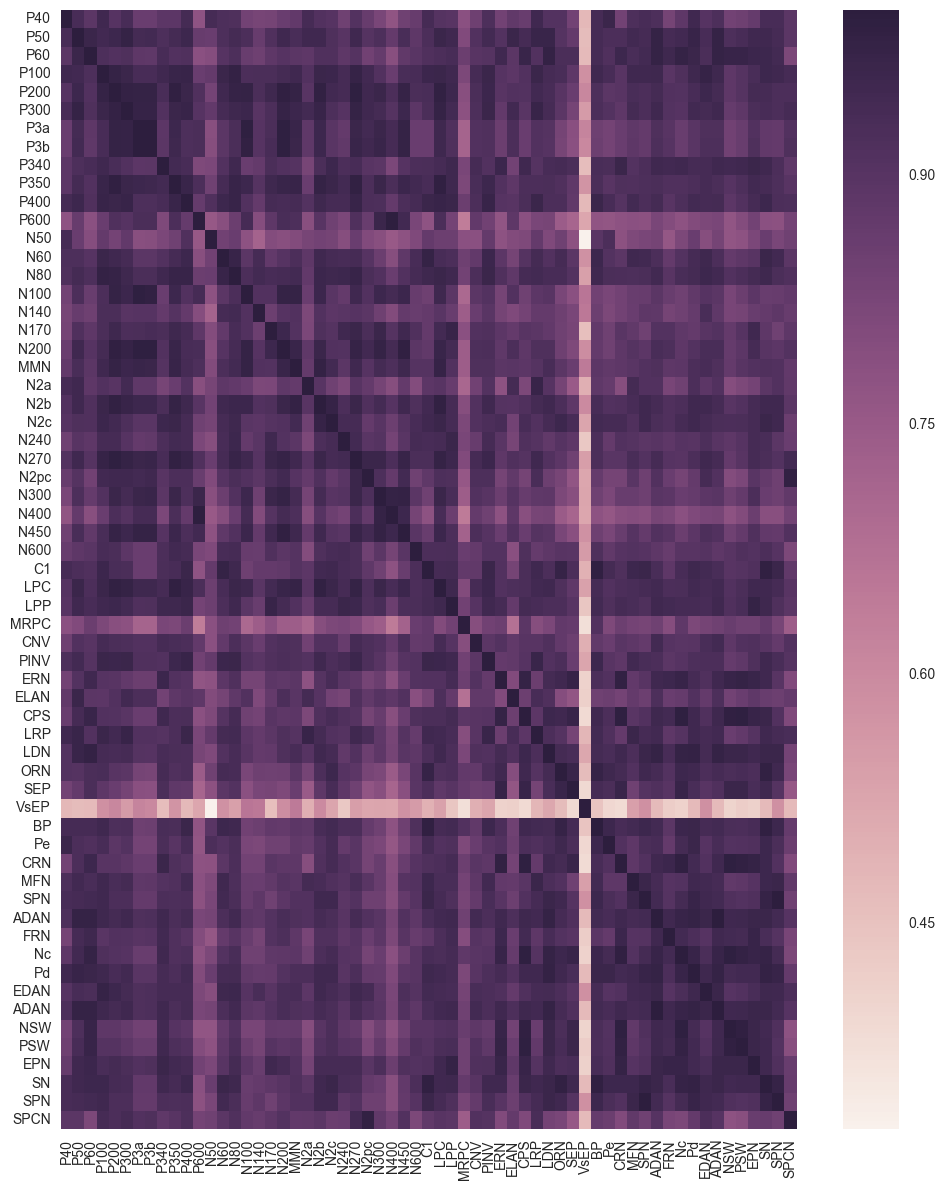

In [29]:
# Plot ERP similarities
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(sim, square=False, 
            xticklabels=[term[0] for term in counts.erps],
            yticklabels=[term[0] for term in counts.erps])
f.tight_layout()

In [38]:
# Create dataframes for plotting clustermaps
dat_per_df = pd.DataFrame(counts.dat_percent,
                          index=[term[0] for term in counts.erps],
                          columns=[term[0] for term in counts.terms])
sim_df = pd.DataFrame(sim,
                      [term[0] for term in counts.erps],
                      [term[0] for term in counts.erps])

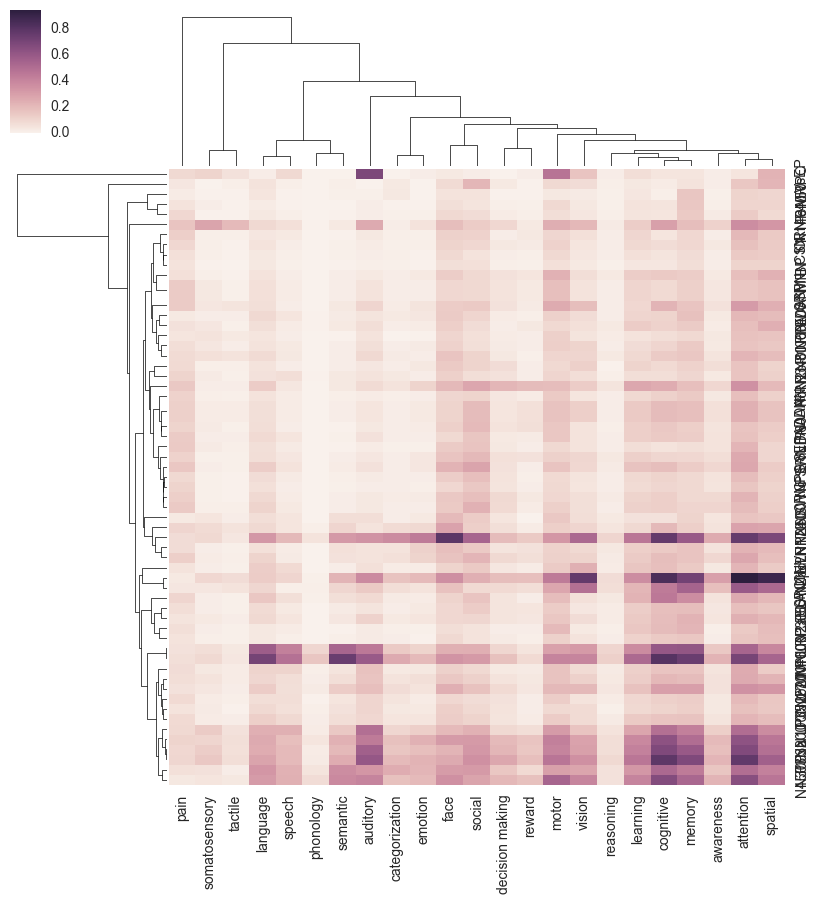

In [39]:
#
sns.clustermap(dat_per_df, method='average', metric='cosine')

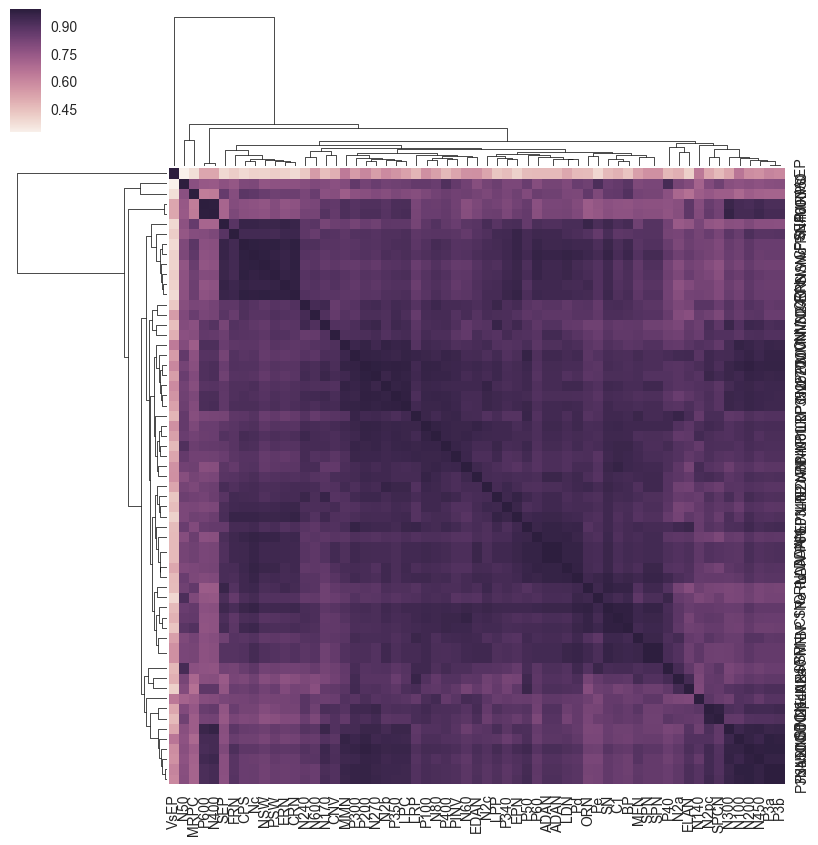

In [40]:
#
sns.clustermap(sim_df)

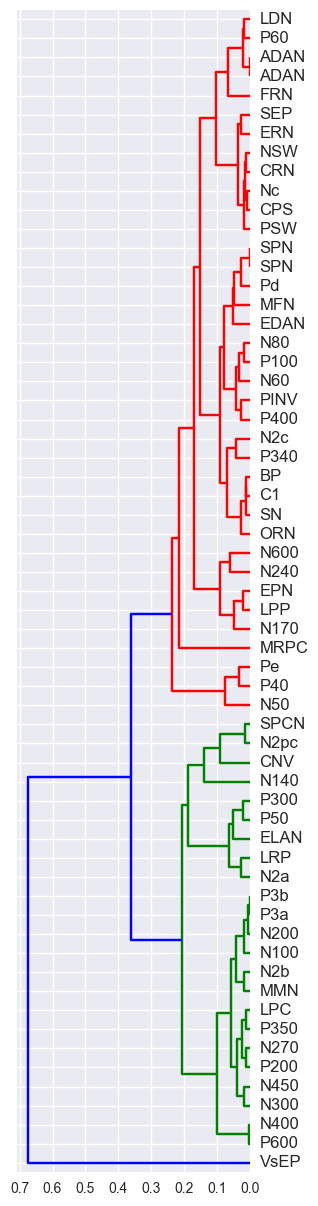

In [47]:
Y = hier.linkage(counts.dat_percent,
                 method='complete',
                 metric='cosine')

plt.figure(figsize=(3,15))

Z = hier.dendrogram(Y, orientation='left',
                    labels=[term[0] for term in counts.erps],
                    color_threshold=0.25,
                    leaf_font_size=12)

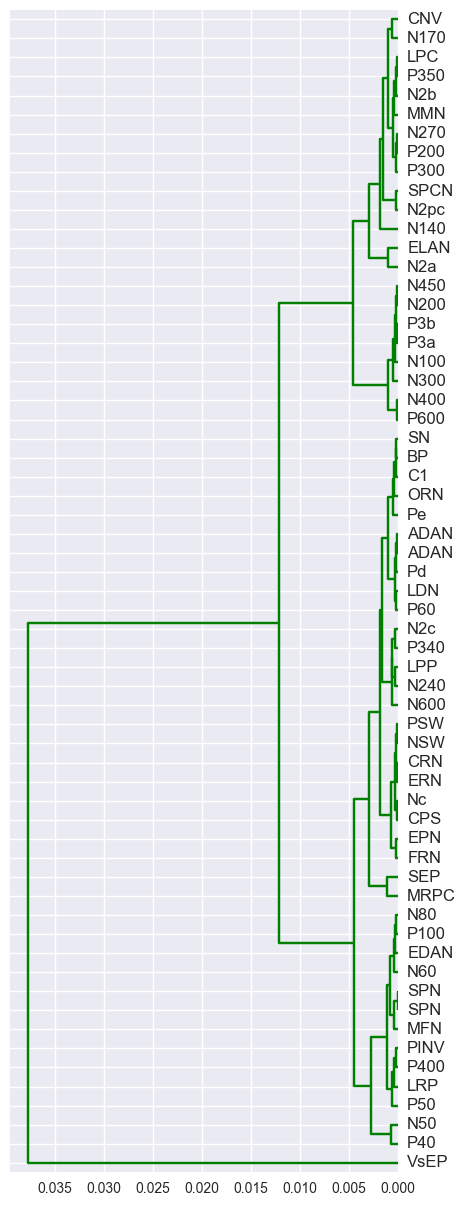

In [51]:
Y = hier.linkage(sim,
                 method='complete',
                 metric='cosine')

plt.figure(figsize=(5,15))

Z = hier.dendrogram(Y, orientation='left',
                    labels=[term[0] for term in counts.erps],
                    color_threshold=0.25,
                    leaf_font_size=12)

In [ ]:
# EXAMPLE CODE:
# Compute and plot dendrogram.
fig = pylab.figure()
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
Y = sch.linkage(D, method='centroid')
Z = sch.dendrogram(Y, orientation='right')
axdendro.set_xticks([])
axdendro.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']
D = D[index,:]
D = D[:,index]
im = axmatrix.matshow(D, aspect='auto', origin='lower')
axmatrix.set_xticks([])
axmatrix.set_yticks([])